In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('Boston.csv')
df.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [7]:
X = df.drop(['medv'], axis=1).copy()
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [8]:
y = df['medv'].copy()
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [9]:
len(y)

506

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
model_xgbr = xgb.XGBRegressor(objective='reg:squarederror', missing=1, n_estimators=10, seed=42,eval_metric='rmse', early_stopping_rounds=50)

model_xgbr.fit(X_train, y_train, verbose=True, eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:7.06792
[1]	validation_0-rmse:5.69350
[2]	validation_0-rmse:4.76884
[3]	validation_0-rmse:4.03158
[4]	validation_0-rmse:3.58793
[5]	validation_0-rmse:3.40384
[6]	validation_0-rmse:3.32656
[7]	validation_0-rmse:3.28071
[8]	validation_0-rmse:3.19857
[9]	validation_0-rmse:3.18344


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=1,
             monotone_constraints=None, multi_strategy=None, n_estimators=10,
             n_jobs=None, num_parallel_tree=None, ...)

In [21]:
score = model_xgbr.score(X_train,y_train)
print("training score:",score)

training score: 0.9832183795059483


In [23]:
cv_score = cross_val_score(model_xgbr, X_train, y_train)
print("CV mean score:", cv_score.mean())

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/xgboost/core.py", line 705, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/xgboost/sklearn.py", line 1247, in fit
    self._Booster = train(
                    ^^^^^^
  File "/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/xgboost/core.py", line 705, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/xgboost/training.py", line 184, in train
    if cb_container.after_iteration(bst, i, dtrain, evals):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/xgboost/callback.py", line 267, in after_iteration
    ret = any(c.after_iteration(model, epoch, self.history) for c in self.callbacks)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/xgboost/callback.py", line 267, in <genexpr>
    ret = any(c.after_iteration(model, epoch, self.history) for c in self.callbacks)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/xgboost/callback.py", line 463, in after_iteration
    raise ValueError(msg)
ValueError: Must have at least 1 validation dataset for early stopping.


In [24]:
y_pred = model_xgbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  10.134274848216139
RMSE:  5.067137424108069


In [25]:
len(y_test)

102

In [26]:
y_test.head()

280    45.4
263    31.0
373    13.8
303    33.1
371    50.0
Name: medv, dtype: float64

In [27]:
y_pred[4]

np.float32(40.451252)

ImportError: You must install graphviz to plot tree

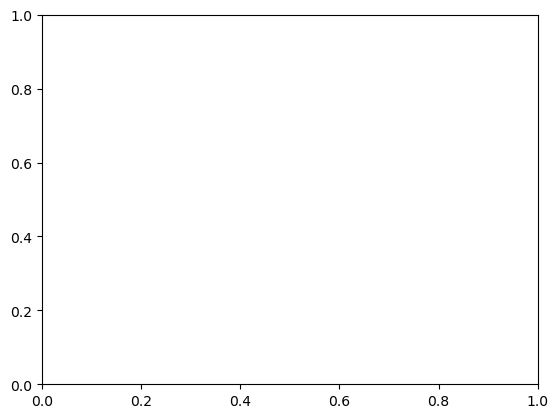

In [28]:
xgb.plot_tree(model_xgbr,num_trees=1)
plt.rcParams['figure.figsize'] = [30, 30]
plt.show()

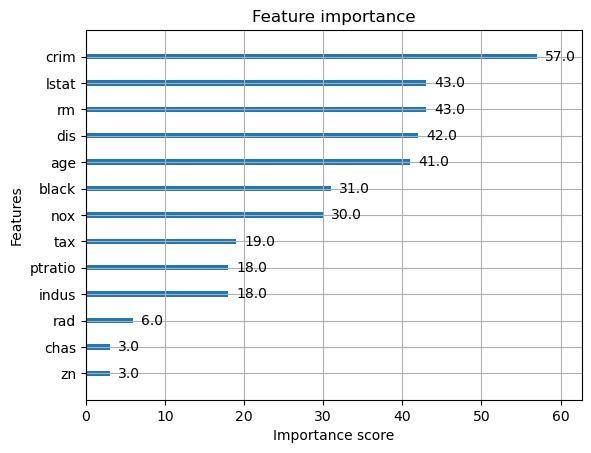

In [29]:
xgb.plot_importance(model_xgbr)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()